# Let's create a model that can distinguish between phishing emails and non-phishing emails using the the following dataset:
* https://www.kaggle.com/datasets/naserabdullahalam/phishing-email-dataset
# 

# Loading Dataset

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/phishing-email-dataset/SpamAssasin.csv
/kaggle/input/phishing-email-dataset/Nazario.csv
/kaggle/input/phishing-email-dataset/Nigerian_Fraud.csv
/kaggle/input/phishing-email-dataset/CEAS_08.csv
/kaggle/input/phishing-email-dataset/Enron.csv
/kaggle/input/phishing-email-dataset/Ling.csv
/kaggle/input/phishing-email-dataset/phishing_email.csv
/kaggle/input/phishml/other/phishing_svm/1/svm_model.pkl


# Dataset exploration

Since the file contains multiple datasets, we can load each dataset into a separate DataFrame and obtain basic information about each one using the .info() method.

In [2]:
import pandas as pd

df_SpamAssasin = pd.read_csv('/kaggle/input/phishing-email-dataset/SpamAssasin.csv')
df_Nigerian_Fraud = pd.read_csv('/kaggle/input/phishing-email-dataset/Nigerian_Fraud.csv')
df_phishing_email = pd.read_csv('/kaggle/input/phishing-email-dataset/phishing_email.csv')
df_CEAS_08 = pd.read_csv('/kaggle/input/phishing-email-dataset/CEAS_08.csv')
df_Enron = pd.read_csv('/kaggle/input/phishing-email-dataset/Enron.csv')
df_Ling = pd.read_csv('/kaggle/input/phishing-email-dataset/Ling.csv')
df_Nazario = pd.read_csv('/kaggle/input/phishing-email-dataset/Nazario.csv')

# Get basic information about the datasets
df_SpamAssasin.info()
df_Nigerian_Fraud.info()
df_phishing_email.info()
df_CEAS_08.info()
df_Enron.info()
df_Ling.info()
df_Nazario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5809 entries, 0 to 5808
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sender    5809 non-null   object
 1   receiver  5599 non-null   object
 2   date      5809 non-null   object
 3   subject   5793 non-null   object
 4   body      5808 non-null   object
 5   label     5809 non-null   int64 
 6   urls      5809 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 317.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3332 entries, 0 to 3331
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sender    3001 non-null   object
 1   receiver  2008 non-null   object
 2   date      2850 non-null   object
 3   subject   3293 non-null   object
 4   body      3332 non-null   object
 5   urls      3332 non-null   int64 
 6   label     3332 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 182.3+ KB


# Number of emails

As we observed in the PhishingVsNon_Phising analysis, the column containing the labels for non-phishing (0) and phishing (1) emails is named "label".

We can now check the number of emails in each category: phishing and non-phishing.


In [5]:
import pandas as pd

# List of dataset paths
file_paths = {
    'SpamAssasin': '/kaggle/input/phishing-email-dataset/SpamAssasin.csv',
    'Nigerian_Fraud': '/kaggle/input/phishing-email-dataset/Nigerian_Fraud.csv',
    'Phishing_Email': '/kaggle/input/phishing-email-dataset/phishing_email.csv',
    'CEAS_08': '/kaggle/input/phishing-email-dataset/CEAS_08.csv',
    'Enron': '/kaggle/input/phishing-email-dataset/Enron.csv',
    'Ling': '/kaggle/input/phishing-email-dataset/Ling.csv',
    'Nazario': '/kaggle/input/phishing-email-dataset/Nazario.csv'
}
# Dictionary to store spam and non-spam counts
spam_nonspam_counts = {}

# Iterate over each dataset
for name, path in file_paths.items():
    try:
        # Load dataset
        df = pd.read_csv(path)

        # Check if 'label' column exists
        if 'label' in df.columns:
            # Count the number of spam and non-spam emails
            spam_count = df[df['label'] == 1].shape[0]
            non_spam_count = df[df['label'] == 0].shape[0]
        else:
            # If 'label' column does not exist, consider all emails as spam
            spam_count = df.shape[0]
            non_spam_count = 0

        # Store the counts in the dictionary
        spam_nonspam_counts[name] = {
            'spam_count': spam_count,
            'non_spam_count': non_spam_count
        }

    except FileNotFoundError:
        print(f"File not found: {path}")

# Display the counts
for dataset, counts in spam_nonspam_counts.items():
    print(f"{dataset}: {counts['spam_count']} spam emails, {counts['non_spam_count']} non-spam email")

SpamAssasin: 1718 spam emails, 4091 non-spam email
Nigerian_Fraud: 3332 spam emails, 0 non-spam email
Phishing_Email: 42891 spam emails, 39595 non-spam email
CEAS_08: 21842 spam emails, 17312 non-spam email
Enron: 13976 spam emails, 15791 non-spam email
Ling: 458 spam emails, 2401 non-spam email
Nazario: 1565 spam emails, 0 non-spam email


The dataset seems a bit imbalaced :

*     Phishing_Email: 42891 spam emails, 39595 non-spam email

We to need to balance the dataset later


# Supervised or Unsupervised Learning?

Given the dataset's characteristics, opting for a supervised learning model is preferable over unsupervised learning.

Unsupervised learning models aim to identify patterns without relying on predefined labels. In contrast, supervised learning utilizes labeled data to construct predictive models capable of making informed classifications or decisions when presented with new input data.




We are going to use SVM in this case as :

*     Is a well-established algorithm
*     Perform well in high-dimensional feature space environments by finding the optimal hyperplane that separates classes, maximizing the margin between different classes
*     Robust on Overfitting
*     Effective with Small to Medium-Sized Datasets



# Model building

Let's import some useful models

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
import numpy as np


TF-IDF vectorization converts textual data into a structured numerical format that enhances the understanding and processing capabilities of machine learning models.

In [9]:
# Separate features (email text) and target (labels)
X = df_phishing_email['text_combined']
y = df_phishing_email['label']

# Convert text data into numerical features using TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
X = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Stop words are common words that appear frequently in natural language texts but typically do not carry significant meaning or contribute to the understanding or classification of the text.

Examples of stop words in English include "the," "and," "is," "of," "in," etc.

By removing stop words, you reduce the amount of noise in the text data, allowing machine learning models to focus on more relevant and informative words.

It will also speeds up processing and improves the efficiency of text processing algorithms


In [10]:
vectorizer_with_stopwords = TfidfVectorizer(max_features=1000, stop_words='english')

# Assuming 'ext_combined' is the correct column name containing text data
X_with_stopwords = vectorizer_with_stopwords.fit_transform(df_phishing_email['text_combined'])

As mentioned earlier, our dataset is imbalanced. To address this, we can use the RandomUnderSampler from the imbalanced-learn library.

This technique reduces the number of instances in the majority class (phishing emails) to balance the class distribution by randomly selecting instances from the majority class to match the number of instances in the minority class (non-phishing emails).


In [12]:
# Undersample the majority class (phishing emails)
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

In [26]:
unique, counts = np.unique(y_train_resampled, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Class Distribution after Undersampling:", class_distribution)

Class Distribution after Undersampling: {0: 31676, 1: 31676}


In [13]:
# Initialize the SVM classifier
svm = SVC(kernel='linear', C=1.0, random_state=42)

# Fit the model on the training data
svm.fit(X_train_resampled, y_train_resampled)

SVC(kernel='linear', random_state=42)

# Result

In [14]:
from sklearn.metrics import accuracy_score 

# Predictions on the test data
y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97


In [62]:
from sklearn.metrics import classification_report
from tabulate import tabulate

# Assuming y_test and y_pred are your actual test labels and predicted labels
# Calculate classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Convert the classification report to a list of lists for tabulate
table_data = []
for label, metrics in report.items():
    if isinstance(metrics, dict):
        table_data.append([label, metrics['precision'], metrics['recall'], metrics['f1-score'], metrics['support']])

# Print the table using tabulate
print(tabulate(table_data, headers=['Class', 'Precision', 'Recall', 'F1-score', 'Support'], tablefmt='github'))

| Class        |   Precision |   Recall |   F1-score |   Support |
|--------------|-------------|----------|------------|-----------|
| 0            |    0.9706   | 0.958833 |   0.96468  |      7919 |
| 1            |    0.962421 | 0.97319  |   0.967776 |      8579 |
| macro avg    |    0.96651  | 0.966012 |   0.966228 |     16498 |
| weighted avg |    0.966347 | 0.966299 |   0.96629  |     16498 |


The model shows high precision and recall for both classes, indicating that it effectively identifies both phishing and non-phishing emails. The F1-scores for both classes are also high, suggesting a good balance between precision and recall.

# Confusion Matrix

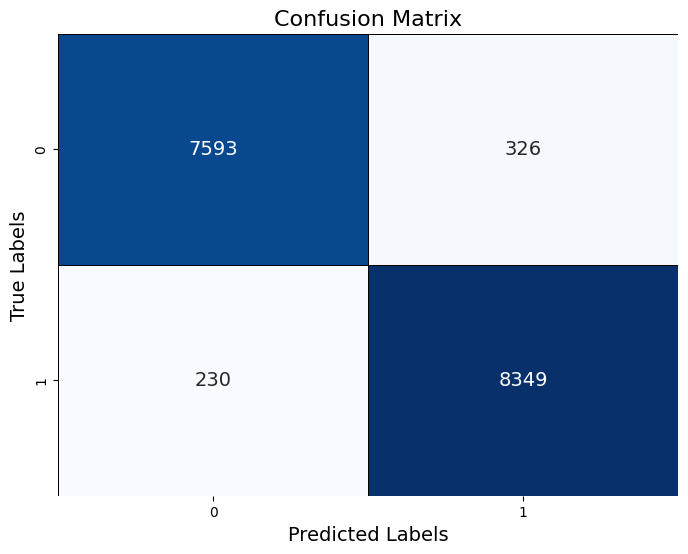

In [63]:
import matplotlib.pyplot as plt

import seaborn as sns

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False,
            annot_kws={'size': 14}, linewidths=0.5, linecolor='black')
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.xticks(ticks=np.arange(2) + 0.5, labels=['0', '1'])
plt.yticks(ticks=np.arange(2) + 0.5, labels=['0', '1'])
plt.show()


True Negatives (TN): 7580

These are the non-phishing emails correctly predicted as non-phishing.

False Positives (FP): 339

These are the non-phishing emails incorrectly predicted as phishing.

False Negatives (FN): 199

These are the phishing emails incorrectly predicted as non-phishing.

True Positives (TP): 8380

These are the phishing emails correctly predicted as phishing.


# PR Curve


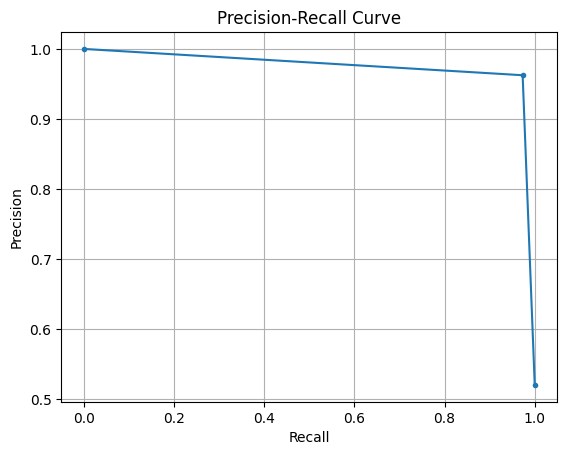

Best Precision: 1.00, Worst Recall: 0.00
Worst Precision: 0.52, Best Recall: 1.00
Best Precision: 0.96, Best Recall: 0.97
F1-score: 0.97
Threshold: 1.00


In [64]:
from sklearn.metrics import precision_recall_curve

# Assuming y_test and y_scores are defined
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Plot Precision-Recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

# Find index of maximum precision
best_precision_idx = np.argmax(precision)

# Find index of minimum precision
worst_precision_idx = np.argmin(precision)

# Print best and worst combination of recall and precision
print(f"Best Precision: {precision[best_precision_idx]:.2f}, Worst Recall: {recall[best_precision_idx]:.2f}")
print(f"Worst Precision: {precision[worst_precision_idx]:.2f}, Best Recall: {recall[worst_precision_idx]:.2f}")

# Calculate F1-score
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find index of maximum F1-score
best_f1_idx = np.argmax(f1_scores)

# Print best balance of precision and recall (or highest F1-score)
print(f"Best Precision: {precision[best_f1_idx]:.2f}, Best Recall: {recall[best_f1_idx]:.2f}")
print(f"F1-score: {f1_scores[best_f1_idx]:.2f}")
print(f"Threshold: {thresholds[best_f1_idx]:.2f}")

* ***Precision*** helps answer: "When the model predicts an email as phishing, how often is it correct?"


* ***Recall*** helps answer: "Out of all actual phishing emails, how many did the model correctly identify?"

* ***F1-score*** is the harmonic mean of precision and recall.It combines precision and recall into a single metric. It ensures that the F1 score reaches
its best value when both precision and recall are high.

At the beginning of the PR curve, the threshold for predicting positive class instances (phishing emails) is set very high. As a result, the classifier makes very few positive predictions, but almost all of them are correct (high precision).

At the end of the PR curve, the threshold for predicting positive class instances is lowered. This results in more positive predictions, but some of them are incorrect (lower precision compared to the starting point).

The PR curve helps in selecting an appropriate threshold based on the specific application needs. A point closer to the top-right corner (high precision and high recall) indicates an optimal balance between precision and recall. The choice of threshold depends on whether precision or recall is more important for the given problem (e.g., minimizing false positives or false negatives).

# Save the Model 

Let's save our model so that next time we need it, we can save some time!

In [65]:
import joblib

# Assuming svm is your trained SVM model
# Save the model to a file
joblib.dump(svm, 'svm_model.pkl')

['svm_model.pkl']

# Load our Model

In [18]:
import joblib

# To load the model from the file
loaded_svm = joblib.load('/kaggle/input/phishml/other/phishing_svm/1/svm_model.pkl')

# Cross-Validation

In order to ensure reliable performance estimation, we can use Cross-Validation which  helps in obtaining a more reliable estimate of how well SVM model will generalize to new data. 

Instead of relying on a single split of data into training and testing sets, cross-validation involves splitting the data multiple times and averaging the results. This reduces the variance in performance estimation compared to a single train-test split.

SVMs have hyperparameters (e.g., regularization parameter C, kernel parameters) that significantly affect their performance. Cross-validation can be used to select the optimal set of hyperparameters by evaluating the model's performance across different parameter values on multiple validation sets.

In real-world scenarios, datasets may contain variability that can affect model performance. Cross-validation helps in assessing how well the SVM model handles this variability by providing multiple evaluations on different subsets of the data.

In [66]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVC
from sklearn.datasets import make_classification  # Replace with your dataset

# Generate a synthetic dataset (replace with your dataset loading code)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVC(kernel='linear', C= 1, random_state=42)

# Perform 5-fold cross-validation
scores = cross_val_score(svm, X_train, y_train, cv=100)

print(f'Cross-Validation Accuracy: {scores.mean():.2f} +/- {scores.std():.2f}')

Cross-Validation Accuracy: 0.88 +/- 0.10


The result above  suggests that, on average, the model correctly predicts the target variable (class labels in a classification problem) approximately 88% of the time across different subsets of the data.

The standard deviation of 0.10 represent the degree of variability in the accuracy scores obtained from each fold of cross-validation.

A lower standard deviation indicates more consistency in model performance across folds.

Let's experiment with some emails from my personal Gmail account to understand whether the model can distinguish between phishing and non-phishing emails.

# Grid Search 

Grid Search is a technique used for hyperparameter tuning that systematically searches through a predefined grid of hyperparameter values and evaluates model performance using cross-validation. 

This method helps identify the optimal combination of hyperparameters for a machine learning model, such as SVM

In [67]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.1, 1, 10],
}



## * The kernel parameter in SVMs specifies the type of function used to transform the input space into a higher-dimensional space where the data points can be more easily separated. 

  * **Linear** = This is the simplest kernel and creates a linear decision boundary.
  * **Polynomial** = Uses a polynomial function with a specified degree "d" and an optional parameter "r"
  * **Radial** Basis Function (RBF) = Uses a Gaussian-like function with parameter "gamma" to measure similarity    between points
  

In [68]:
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [69]:
# Print results
print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)
print("Test Set Accuracy:", accuracy)

Best Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Best Cross-Validation Accuracy: 0.87375
Test Set Accuracy: 0.88


# Real-Word Test


Let's evaluate our model using real-world emails extracted from my personal Gmail account to assess its classification performance.

In [70]:
 data = {
    'descriptor': [
        "Right To rent request",
        "Unknown loan request",
        "Email verification",
        "Follow up  with letting agency",
        "Unknown  loan approval!",
        "Confirmation for a property view",
        "Registration for Agency"

    ],
    'email_text': [
        "Good afternoon,Hope you are well.The management company asks for your right to rent share codes. Please can you send me the share codes to prove your right to rent for yourself and your partner.Thank you.",
        "Welcome! Welcome! We'll transfer your loan as quickly as possible into your bank account. Our aim is to make your loan as easy as is possible.",
        "Please use the above code to verify your email ID for signing into Bito Workspace.Thank you,Team Bito.",
        "Hi, I hope you are well. I just wanted to follow up after the viewing we had on Friday at the Royal Winchester House. Have you made a decision on whether to proceed or not?",
        "Hello there! We are so happy to help you get your loan. We promise to get the amount of your loan directly into your bank account as fast as we can. Our goal is to simplify the loan process for you. Get Loan Now",
        "This is to confirm that your viewing has been arranged for Friday, 14 June 2024 at 3:00 PM at the following properties. The meeting point is at Rrakell",
        "Good day,Hope all is well!.Thank you for your interest in Cromwell Medical Staffing!In order to complete your registration with us, there are a few steps that need to be completed.Step 1  - Internal documents to be completed and signed by yourself "
    ],
    'true_labels': [0, 1, 0, 0, 1, 0, 0]  # Example true labels (0: non-phishing, 1: phishing)
}

df = pd.DataFrame(data)

In [71]:
# Initialize lists to store descriptors, predictions, and true labels
descriptors = []
predictions = []
true_labels = []
email_texts = []

# Iterate over each row in the dataframe
for index, row in df.iterrows():
    descriptor = row['descriptor']
    email_text = row['email_text']
    true_label = row['true_labels']

    # Preprocess the email text (assuming 'vectorizer' is your TF-IDF vectorizer)
    X_email = vectorizer.transform([email_text])

    # Predict using the SVM model
    predicted_label = loaded_svm.predict(X_email)

    # Append the descriptor, predicted label, true label, and email text to their respective lists
    descriptors.append(descriptor)
    predictions.append(predicted_label[0])  # Since predicted_label is an array, get the first element
    true_labels.append(true_label)
    email_texts.append(email_text)

# Convert lists to numpy arrays for easier comparison
descriptors = np.array(descriptors)
predictions = np.array(predictions)
true_labels = np.array(true_labels)
email_texts = np.array(email_texts)


In [72]:
# Print descriptors, predicted labels, true labels, and email texts
for i in range(len(descriptors)):
    print(f"\nDescriptor: {descriptors[i]}")
    print(f"Predicted label: {'Phishing' if predictions[i] == 1 else 'Non-phishing'}")
    print(f"True label: {'Phishing' if true_labels[i] == 1 else 'Non-phishing'}")
    print(f"\nEmail text: {email_texts[i]}")




Descriptor: Right To rent request
Predicted label: Non-phishing
True label: Non-phishing

Email text: Good afternoon,Hope you are well.The management company asks for your right to rent share codes. Please can you send me the share codes to prove your right to rent for yourself and your partner.Thank you.

Descriptor: Unknown loan request
Predicted label: Phishing
True label: Phishing

Email text: Welcome! Welcome! We'll transfer your loan as quickly as possible into your bank account. Our aim is to make your loan as easy as is possible.

Descriptor: Email verification
Predicted label: Non-phishing
True label: Non-phishing

Email text: Please use the above code to verify your email ID for signing into Bito Workspace.Thank you,Team Bito.

Descriptor: Follow up  with letting agency
Predicted label: Non-phishing
True label: Non-phishing

Email text: Hi, I hope you are well. I just wanted to follow up after the viewing we had on Friday at the Royal Winchester House. Have you made a decisi

# Logistic regression

Let's try using Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler

# Initialize the Logistic Regression classifier
log_reg = LogisticRegression(random_state=42)

# Undersample the majority class (phishing emails)
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Fit the model on the training data
log_reg.fit(X_train_resampled, y_train_resampled)

# Evaluate the model on the test data
test_accuracy = log_reg.score(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")
In conclusion, while the SVM model effectively classified most emails as phishing or non-phishing based on descriptors and content, there were instances of misclassification. 

Specifically, the email regarding registration with Cromwell Medical Staffing was erroneously labeled as phishing despite its legitimate nature.

In the context of phishing detection, it is often preferable to have more false positives than false negatives to minimize the risk of overlooking potentially malicious emails

In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
# Separate features (email text) and target (labels)
X = df_phishing_email['text_combined']
y = df_phishing_email['label']

# Convert text data into numerical features using TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
X = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [78]:
# Undersample the majority class (phishing emails)
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

In [117]:
# Initialize the Logistic Regression classifier
log_reg = LogisticRegression(random_state=42)

# Undersample the majority class (phishing emails)
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Fit the model on the training data
log_reg.fit(X_train_resampled, y_train_resampled)

# Evaluate the model on the test data
test_accuracy = log_reg.score(X_test, y_test)
test_accuracy_round = round(test_accuracy,2)
test_accuracy_perc = f"{test_accuracy_round * 100:.2f}%"
print(f"Test accuracy: {test_accuracy_perc}")


Test accuracy: 96.00%


In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import RandomUnderSampler
import numpy as np

# Assuming X_train, y_train are already defined

# Initialize the Logistic Regression classifier
log_reg = LogisticRegression(random_state=42)

# Undersample the majority class (phishing emails)
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(log_reg, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')

# Calculate mean and standard deviation of accuracy
mean_accuracy = np.mean(cv_scores)
std_accuracy = np.std(cv_scores)

# Round mean and std to 2 decimal places
mean_accuracy_rounded = round(mean_accuracy, 2)
std_accuracy_rounded = round(std_accuracy, 2)

# Format as percentages
mean_accuracy_percent = f"{mean_accuracy_rounded * 100:.2f}%"
std_accuracy_percent = f"{std_accuracy_rounded * 100:.2f}%"

print(f"Mean Cross-Validation Accuracy: {mean_accuracy_percent} +/- {std_accuracy_percent}")



Mean Cross-Validation Accuracy: 97.00% +/- 0.00%


Best Parameters: {'C': 100.0, 'penalty': 'l2'}
Best Mean Cross-Validation Accuracy: 0.97


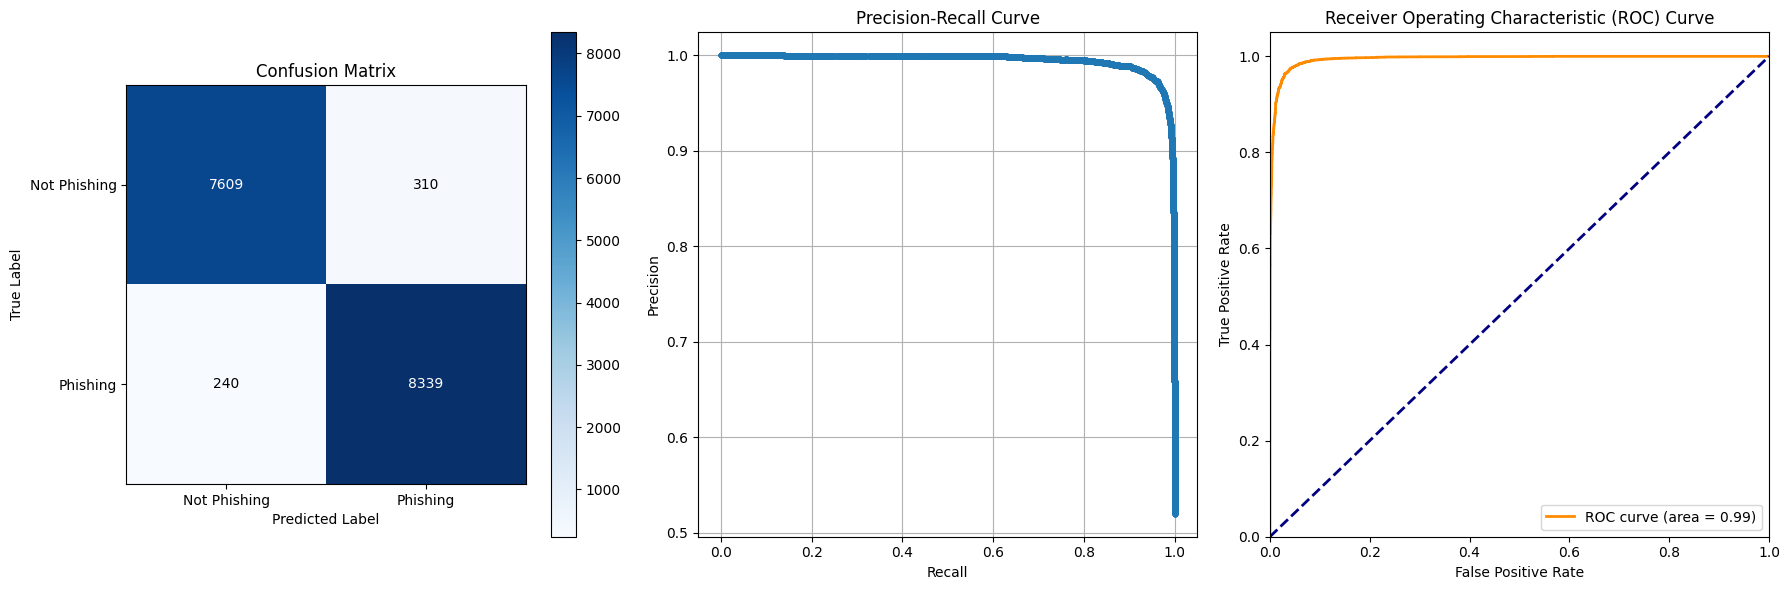

Best Precision: 1.00, Worst Recall: 0.14
Worst Precision: 0.52, Best Recall: 1.00
Best Precision: 0.96, Best Recall: 0.97
F1-score: 0.97
Threshold: 0.46


In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import precision_recall_curve, confusion_matrix, accuracy_score, roc_curve, auc
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train, X_test, y_train, y_test are defined

# Define the grid of parameters
param_grid = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],  # Regularization parameter
    'penalty': ['l2', 'none']  # Type of regularization
}

# Perform grid search
best_score = 0
best_params = {}

for C in param_grid['C']:
    for penalty in param_grid['penalty']:
        # Initialize Logistic Regression with current parameters
        log_reg = LogisticRegression(C=C, penalty=penalty, random_state=42)

        # Undersample the majority class (phishing emails)
        undersampler = RandomUnderSampler(random_state=42)
        X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

        # Perform 5-fold cross-validation
        cv_scores = cross_val_score(log_reg, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
        mean_cv_score = cv_scores.mean()

        # Track the best parameters and best mean accuracy
        if mean_cv_score > best_score:
            best_score = mean_cv_score
            best_params = {'C': C, 'penalty': penalty}

# Print the best parameters and best mean cross-validation accuracy
print(f"Best Parameters: {best_params}")
print(f"Best Mean Cross-Validation Accuracy: {best_score:.2f}")

# Initialize Logistic Regression with best parameters
best_log_reg = LogisticRegression(**best_params, random_state=42)

# Fit the model on the resampled training data
best_log_reg.fit(X_train_resampled, y_train_resampled)

# Predict probabilities for the test set
y_scores = best_log_reg.predict_proba(X_test)[:, 1]

# Compute Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Compute ROC curve
fpr, tpr, roc_thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot Confusion Matrix, Precision-Recall Curve, and ROC Curve side by side
plt.figure(figsize=(18, 6))

# Plot Confusion Matrix
plt.subplot(1, 3, 1)
conf_matrix = confusion_matrix(y_test, best_log_reg.predict(X_test))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ['Not Phishing', 'Phishing'])
plt.yticks(tick_marks, ['Not Phishing', 'Phishing'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

# Plot Precision-Recall Curve
plt.subplot(1, 3, 2)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)

# Plot ROC Curve
plt.subplot(1, 3, 3)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

# Find index of maximum precision
best_precision_idx = np.argmax(precision)

# Find index of minimum precision
worst_precision_idx = np.argmin(precision)

# Print best and worst combination of recall and precision
print(f"Best Precision: {precision[best_precision_idx]:.2f}, Worst Recall: {recall[best_precision_idx]:.2f}")
print(f"Worst Precision: {precision[worst_precision_idx]:.2f}, Best Recall: {recall[worst_precision_idx]:.2f}")

# Calculate F1-score
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find index of maximum F1-score
best_f1_idx = np.argmax(f1_scores)

# Print best balance of precision and recall (or highest F1-score)
print(f"Best Precision: {precision[best_f1_idx]:.2f}, Best Recall: {recall[best_f1_idx]:.2f}")
print(f"F1-score: {f1_scores[best_f1_idx]:.2f}")
print(f"Threshold: {thresholds[best_f1_idx]:.2f}")


# Random Forest

We can try to use Random Forest to see whether is going to perfom better than SVM and Logistic Regression 

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [6]:
# Separate features (email text) and target (labels)
X = df_phishing_email['text_combined']
y = df_phishing_email['label']

# Convert text data into numerical features using TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
X = vectorizer.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Undersample the majority class (phishing emails)
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)



In [8]:
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model on the resampled training data
rf_classifier.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(random_state=42)

In [12]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the resampled data
cv_scores = cross_val_score(rf_classifier, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.2f}")

Mean Cross-Validation Accuracy: 0.98


In [14]:
# Calculate mean and standard deviation of accuracy
mean_accuracy = np.mean(cv_scores)
std_accuracy = np.std(cv_scores)

# Round mean and std to 2 decimal places
mean_accuracy_rounded = round(mean_accuracy, 2)
std_accuracy_rounded = round(std_accuracy, 2)


# Format as percentages
mean_accuracy_percent = f"{mean_accuracy_rounded * 100:.2f}%"
std_accuracy_percent = f"{std_accuracy_rounded * 100:.2f}%"

print(f"Mean Cross-Validation Accuracy: {mean_accuracy_percent} +/- {std_accuracy_percent}")


Mean Cross-Validation Accuracy: 98.00% +/- 0.00%


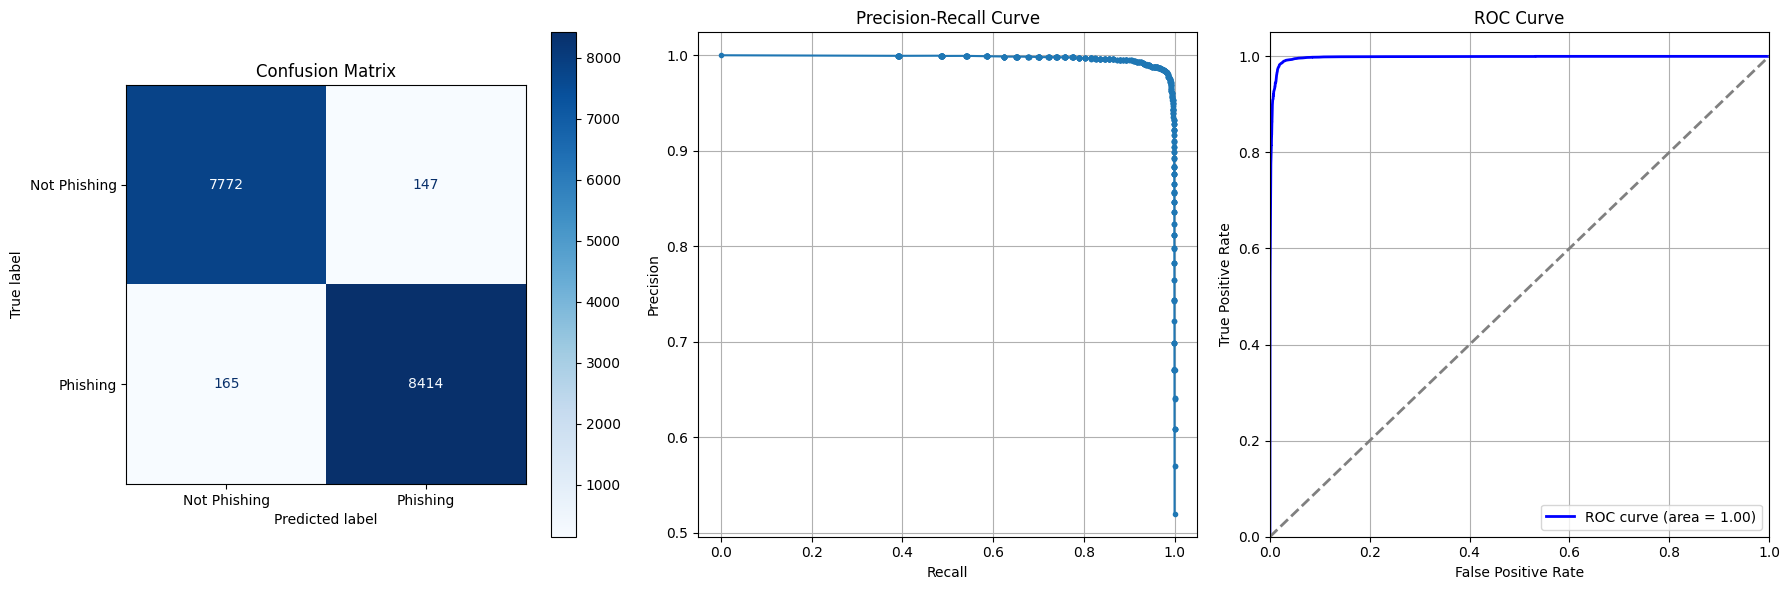

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Assuming df_phishing_email is already defined
# Separate features (email text) and target (labels)
X = df_phishing_email['text_combined']
y = df_phishing_email['label']

# Convert text data into numerical features using TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X = vectorizer.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Undersample the majority class (phishing emails)
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model on the resampled training data
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Generate predictions and probabilities on the test data
y_pred = rf_classifier.predict(X_test)
y_proba = rf_classifier.predict_proba(X_test)[:, 1]

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Compute precision-recall curve
precisions, recalls, pr_thresholds = precision_recall_curve(y_test, y_proba)

# Compute ROC curve and ROC area
fpr, tpr, roc_thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plotting Confusion Matrix, Precision-Recall Curve, and ROC Curve side by side
plt.figure(figsize=(18, 6))

# Plot Confusion Matrix
plt.subplot(1, 3, 1)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Not Phishing', 'Phishing']).plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.title('Confusion Matrix')

# Plot Precision-Recall Curve
plt.subplot(1, 3, 2)
plt.plot(recalls, precisions, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)

# Plot ROC Curve
plt.subplot(1, 3, 3)
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)

plt.tight_layout()
plt.show()

